<a href="https://colab.research.google.com/github/jane95924/WEEK_14_IP/blob/master/PART_1_AND_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DIMENSIONALITY REDUCTION.

PART 1

PCA and T-SNE

Defining the question.

Based on the dataset we have been given from carrefour supermarket kenya, we are tasked to explore and inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax)

In [1]:
#Loading our dataset
data<-read.csv('http://bit.ly/CarreFourDataset')
head(data)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
#previewing the tail
tail(data)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


##INITIAL EXPLORATION

In [ ]:
#Check the dataset dimension
dim(data)

[1] 1000   16

Our dataset has 1000 rows and 16 columns

In [ ]:
#check the structure
str(data)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

We will split date and time to respective month,year,date,hour and minute.The invoice ID does not communicate much, we can drop that column. Some of the variables are factor, we will change that to numeric, PCA is only applied to numeric variables.

In [ ]:
#check the dataset class
class(data)

[1] "data.frame"

In [ ]:
#check the data summary.
summary(data)

       Invoice.ID  Branch  Customer.type    Gender   
 101-17-6199:  1   A:340   Member:501    Female:501  
 101-81-4070:  1   B:332   Normal:499    Male  :499  
 102-06-2002:  1   C:328                             
 102-77-2261:  1                                     
 105-10-6182:  1                                     
 105-31-1824:  1                                     
 (Other)    :994                                     
                 Product.line   Unit.price       Quantity          Tax         
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
        

In [ ]:
#checking the column names
print(names(data))

 [1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"                  


##DATA CLEANING

In [ ]:
#Check for null values
anyNA(data)

[1] FALSE

we have no null values in our dataset.

In [ ]:
#checking for duplicates
anyDuplicated(data)

[1] 0

we have no duplicates in our dataset

In [2]:
# splitting the Date column into Day, Month, and Year columns, and storing the results as factors
data$Day <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%d"))
data$Month <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%m"))
data$Year <- as.factor(format(as.POSIXct(data$Date, format="%m/%d/%Y"), "%Y"))

# splitting the Time variable into Hour and Minute, and storing the results as factors
data$Hour <- as.factor(format(as.POSIXct(data$Time, format="%H:%M"), "%H"))
data$Minute <- as.factor(format(as.POSIXct(data$Time, format="%H:%M"), "%M"))

# dropping "Date" and "Time" since they are no longer useful
data$Date <- NULL
data$Time <- NULL

# previewing our modified dataset
head(data)

# previewing the dimensions of our modified dataset
dim(data)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Day,Month,Year,Hour,Minute
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,05,01,2019,13,08
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,4.761905,3.8200,9.6,80.2200,08,03,2019,10,29
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,4.761905,16.2155,7.4,340.5255,03,03,2019,13,23
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,27,01,2019,20,33
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,08,02,2019,10,37
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,25,03,2019,18,30


[1] 1000   19

In [3]:
#we can drop the invoice id too
data$Invoice.ID<-NULL

In [ ]:
#check the names of our columns to confirm we dropped the invoice ID
names(data)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Tax"                     "Payment"                
 [9] "cogs"                    "gross.margin.percentage"
[11] "gross.income"            "Rating"                 
[13] "Total"                   "Day"                    
[15] "Month"                   "Year"                   
[17] "Hour"                    "Minute"

In [4]:
# we change the factor to numeric
data1<- data
data1$Branch <- as.numeric(data$Branch)
data1$Customer.type <- as.numeric(data$Customer.type)
data1$Gender <- as.numeric(data$Gender)
data1$Product.line <- as.numeric(data$Product.line)
data1$Payment <- as.numeric(data$Payment)
data1$Day <- as.numeric(data$Day)
data1$Month <- as.numeric(data$Month)
data1$Hour <- as.numeric(data$Hour)
data1$Minute <- as.numeric(data$Minute)


In [5]:
#we change this to numeric to avoid a varriance of 0
data1$Quantity<-as.numeric(data$Quantity)

In [6]:
#removing year since we only have 2019
data1$Year<-NULL

In [7]:
str(data1)#checking the structure.

'data.frame':	1000 obs. of  17 variables:
 $ Branch                 : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : num  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Day                    : num  5 8 3 27 8 25 25 24 10 20 ...
 $ Month                  : num  1 3 3 1 2 3 2 2 1 2 ...
 $ Hour                   : num  4 1

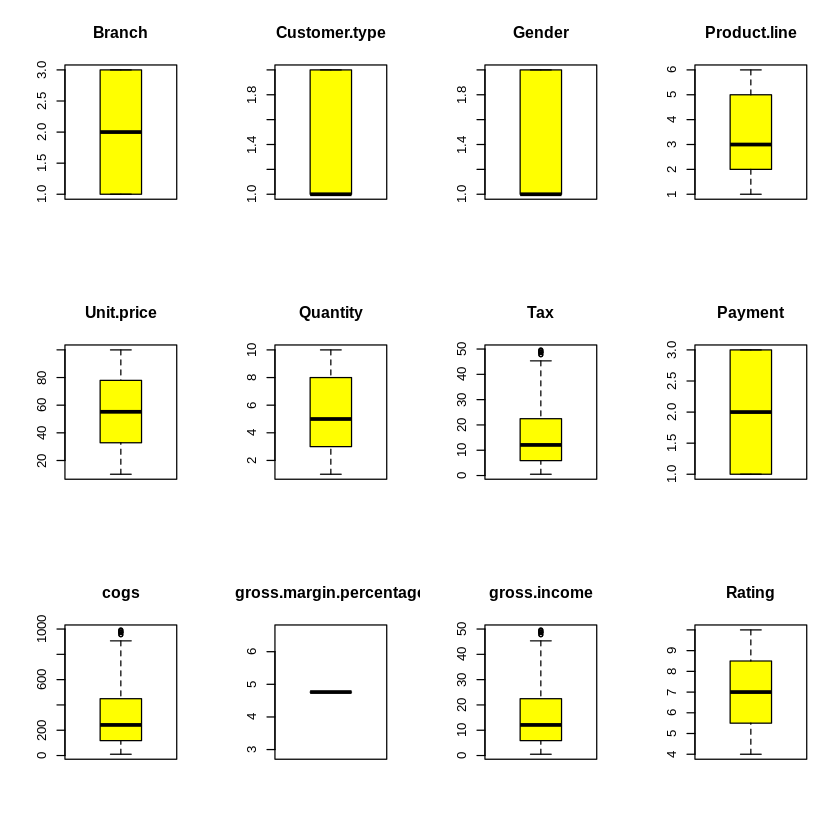

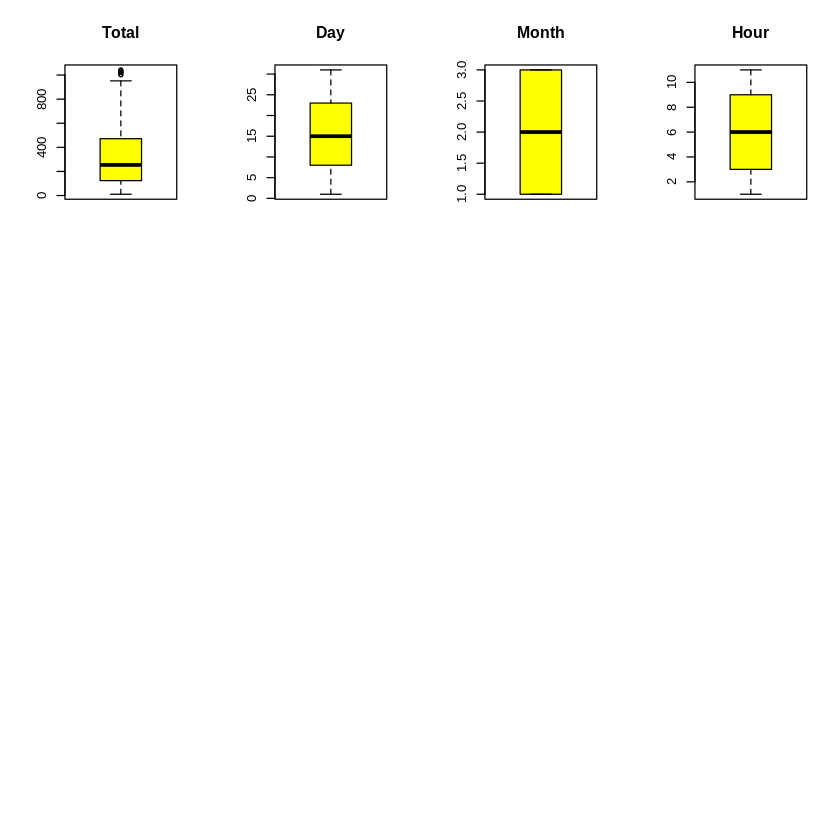

In [8]:
# Creating separate boxplots for each attribute
par(mfrow=c(3,4))
for(i in 1:16) {
	boxplot(data1[,i], main=names(data1)[i], col = "yellow")}


Some of the variables have outliers,cogs, tax and gross income,but we will not deal with them.This is a representation of sales in real world.

##DIMENSIONALITY REDUCTION


We will apply PCA and T-SNE

In [9]:
#Drop the column that has zero variance.Brings an error when fitting to PCA.
data1$gross.margin.percentage<-NULL

In [10]:
# Supply names of columns that have 0 variance
names(data1[, sapply(data1, function(v) var(v, na.rm=TRUE)==0)])
#we have no column with 0 variance

character(0)

In [11]:
data1[,sapply(data1, function(v) var(v, na.rm=TRUE)!=0)]

Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,4,74.69,7,26.1415,3,522.83,26.1415,9.1,548.9715,5,1,4,9
3,2,1,1,15.28,5,3.8200,1,76.40,3.8200,9.6,80.2200,8,3,1,30
1,2,2,5,46.33,7,16.2155,2,324.31,16.2155,7.4,340.5255,3,3,4,24
1,1,2,4,58.22,8,23.2880,3,465.76,23.2880,8.4,489.0480,27,1,11,34
1,2,2,6,86.31,7,30.2085,3,604.17,30.2085,5.3,634.3785,8,2,1,38
3,2,2,1,85.39,7,29.8865,3,597.73,29.8865,4.1,627.6165,25,3,9,31
1,1,1,1,68.84,6,20.6520,3,413.04,20.6520,5.8,433.6920,25,2,5,37
3,2,1,5,73.56,10,36.7800,3,735.60,36.7800,8.0,772.3800,24,2,2,39
1,1,1,4,36.26,2,3.6260,2,72.52,3.6260,7.2,76.1460,10,1,8,16


In [12]:
names(data1[,apply(data1, 2, var, na.rm=TRUE) != 0])

[1] "Branch"        "Customer.type" "Gender"        "Product.line" 
 [5] "Unit.price"    "Quantity"      "Tax"           "Payment"      
 [9] "cogs"          "gross.income"  "Rating"        "Total"        
[13] "Day"           "Month"         "Hour"          "Minute"

In [13]:
anyNA(data1)

[1] FALSE

In [14]:
# We  pass data1          
# prcomp(). We also set two arguments, center and scale, 
# to be TRUE then preview our object with summary
# 
data1.pca <- prcomp(data1, center = TRUE, scale. = TRUE)
summary(data1.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2205 1.0874 1.08282 1.05002 1.02123 1.01763 0.99088
Proportion of Variance 0.3081 0.0739 0.07328 0.06891 0.06518 0.06472 0.06136
Cumulative Proportion  0.3081 0.3821 0.45533 0.52424 0.58942 0.65414 0.71551
                          PC8    PC9    PC10    PC11    PC12   PC13      PC14
Standard deviation     0.9757 0.9641 0.95863 0.92025 0.90270 0.2994 2.718e-16
Proportion of Variance 0.0595 0.0581 0.05744 0.05293 0.05093 0.0056 0.000e+00
Cumulative Proportion  0.7750 0.8331 0.89054 0.94347 0.99440 1.0000 1.000e+00
                          PC15      PC16
Standard deviation     1.8e-16 9.964e-17
Proportion of Variance 0.0e+00 0.000e+00
Cumulative Proportion  1.0e+00 1.000e+00

We have a total of 16 principal components. These are normalized linear combination of the original predictors in the dataset.


In [15]:
# Calling str() to have a look at our PCA object
str(data1.pca)

List of 5
 $ sdev    : num [1:16] 2.22 1.09 1.08 1.05 1.02 ...
 $ rotation: num [1:16, 1:16] 0.0224 -0.0125 -0.0283 0.0174 0.2911 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:16] 1.99 1.5 1.5 3.45 55.67 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ scale   : Named num [1:16] 0.818 0.5 0.5 1.715 26.495 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ x       : num [1:1000, 1:16] 2.05 -2.287 0.126 1.466 2.743 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


We can see the scale, center and the sdev.

In [16]:
# We will now plot our pca. This will provide us with some very useful insights 
# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis




farver    (2.0.1 -> 2.0.3 ) [CRAN]
backports (1.1.9 -> 1.1.10) [CRAN]
rprojroot (1.2   -> 1.3-2 ) [CRAN]
plyr      (NA    -> 1.8.6 ) [CRAN]


Installing 4 packages: farver, backports, rprojroot, plyr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp07VCVa/remotes65442b02a9/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: ggplot2

Loading required package: plyr

Loading required package: scales

Loading required package: grid



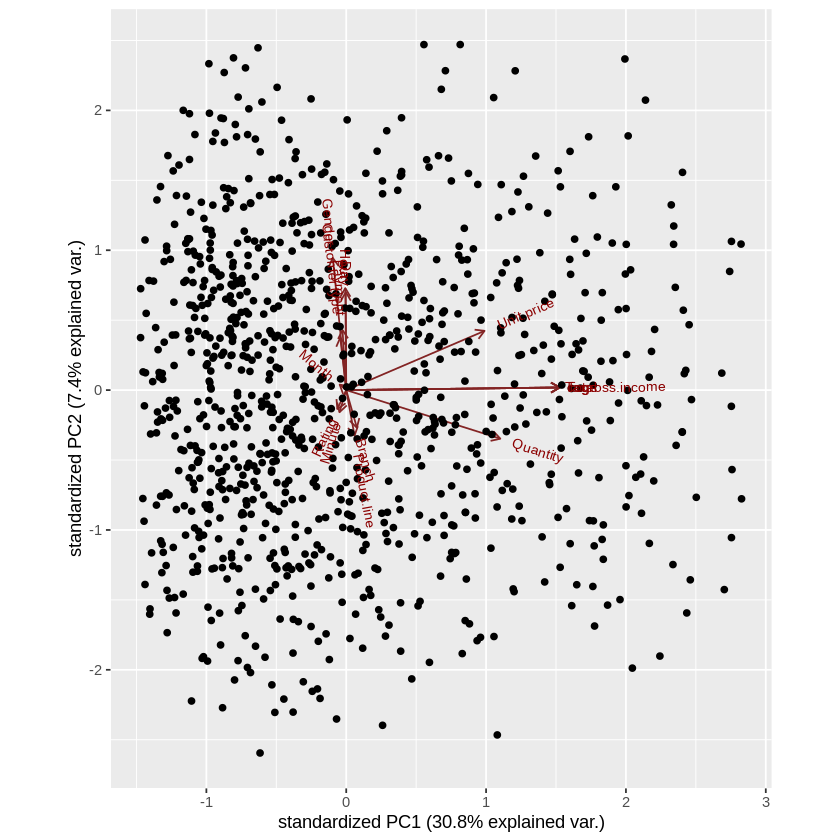

In [ ]:
# Then Loading our ggbiplot library
#  
library(ggbiplot)
ggbiplot(data1.pca)

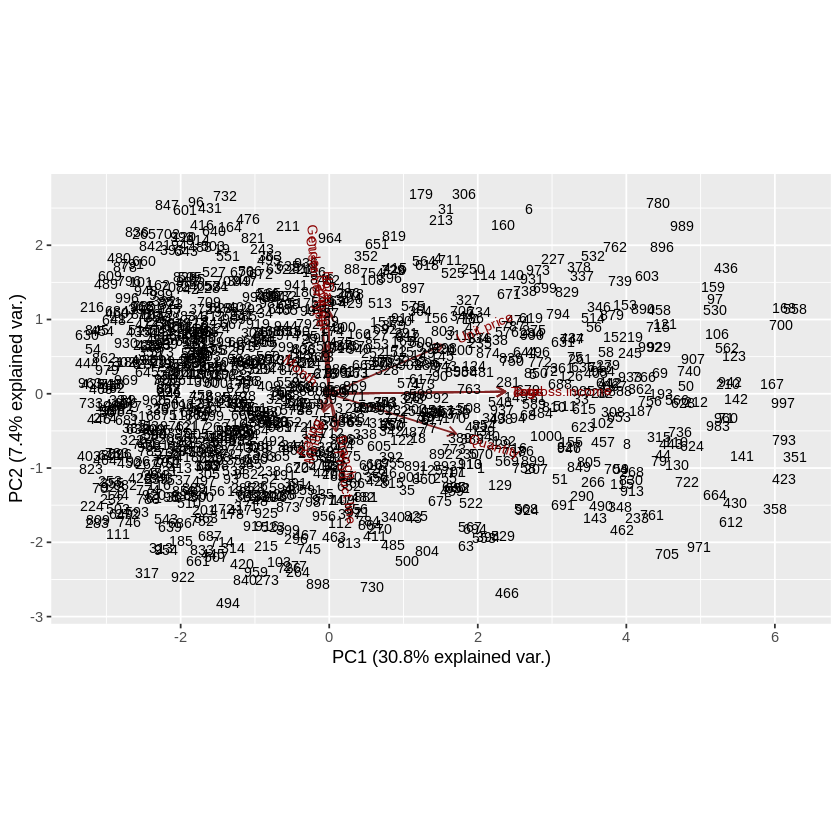

In [ ]:
# Adding more detail to the plot, we provide arguments rownames as labels
# 
ggbiplot(data1.pca, labels=rownames(data1), obs.scale = 1, var.scale = 1)

##t-SNE

In [17]:
# Installing Rtnse package
install.packages("Rtsne")
# Loading our tnse library
library(Rtsne)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
# Curating the database for analysis 
# making a copy of the dataset where we use Rating as a factor
df1 <- data1
df1$Rating <- as.factor(df1$Rating)
# For plotting
#
colors = rainbow(length(unique(df1$Rating)))
names(colors) = unique(df1$Rating)

In [22]:
# executing the algorithm on curated data
tsne <- Rtsne(df1[, -1], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

Performing PCA
Read the 1000 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.11 seconds (sparsity = 0.101678)!
Learning embedding...
Iteration 50: error is 62.557007 (50 iterations in 0.17 seconds)
Iteration 100: error is 53.865446 (50 iterations in 0.13 seconds)
Iteration 150: error is 52.861073 (50 iterations in 0.13 seconds)
Iteration 200: error is 52.410310 (50 iterations in 0.13 seconds)
Iteration 250: error is 52.157722 (50 iterations in 0.14 seconds)
Iteration 300: error is 0.708632 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.548644 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.511912 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.491205 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.477302 (50 iterations in 0.12 seconds)
Fitting performed in 1.33 seconds.


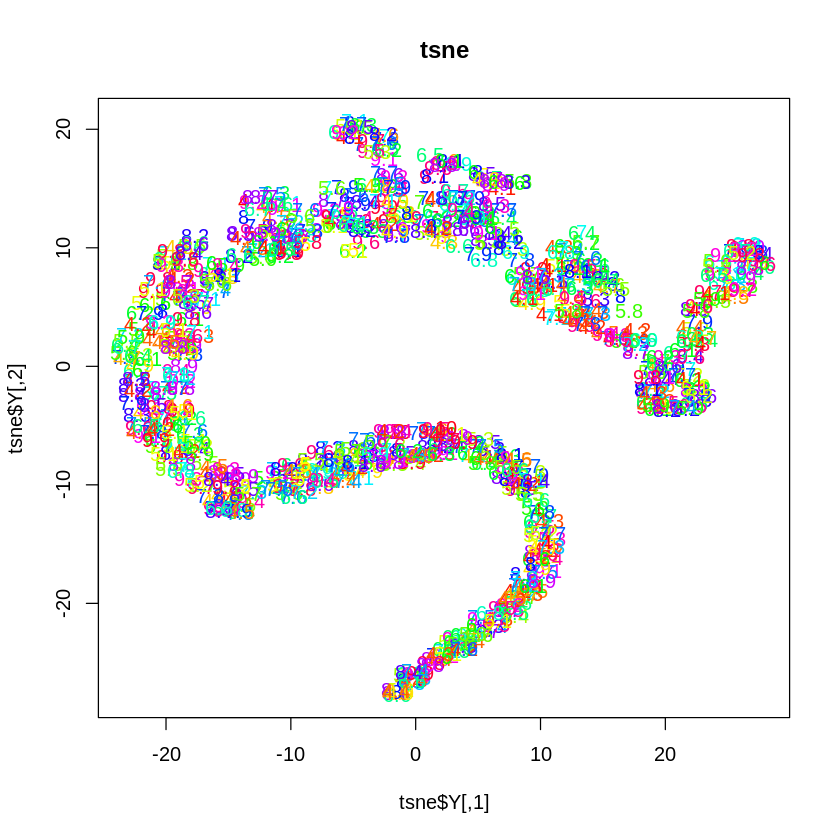

In [23]:
# plotting our graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df1$Rating,
col = colors[df1$Rating])

Performing PCA
Read the 1000 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.101692)!
Learning embedding...
Iteration 50: error is 60.299762 (50 iterations in 0.14 seconds)
Iteration 100: error is 53.869142 (50 iterations in 0.12 seconds)
Iteration 150: error is 52.737210 (50 iterations in 0.13 seconds)
Iteration 200: error is 52.321802 (50 iterations in 0.13 seconds)
Iteration 250: error is 52.077115 (50 iterations in 0.13 seconds)
Iteration 300: error is 0.716551 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.553530 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.510958 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.489616 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.478366 (50 iterations in 0.13 seconds)
Fitting performed in 1.30 seconds.


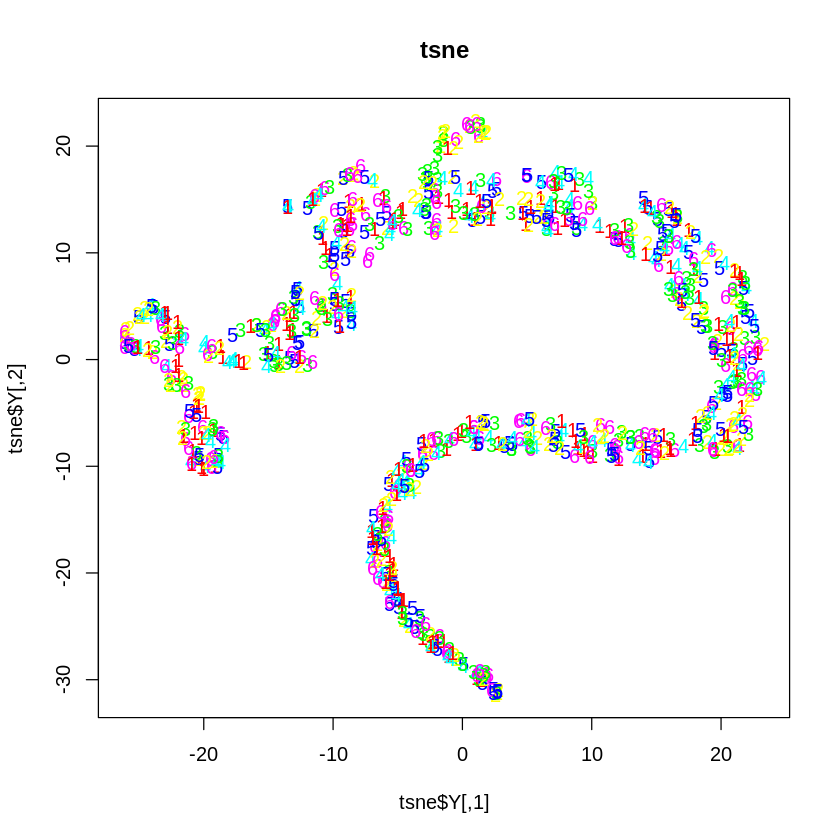

In [26]:
#  attempting t-SNE with the Product.line variable

# making a copy of the dataset 
df_prod <- data1
df_prod$Product.line <- as.factor(df_prod$Product.line)

# for plotting
colors = rainbow(length(unique(df_prod$Product.line)))
names(colors) = unique(df_prod$Product.line)

# executing the algorithm on curated data
tsne <- Rtsne(df_prod[, -4], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# plotting our graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df_prod$Product.line,
col = colors[df_prod$Product.line])

###PART 2

FEATURE SELECTION

1. FILTER METHOD

In [ ]:
# Installing and loading our caret package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

In [ ]:
install.packages('corrplot')
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



In [ ]:
# Calculating the correlation matrix
correlationMatrix <- cor(data1)

# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes
highlyCorrelated

names(data1[,highlyCorrelated])

[1]  9 12  7

[1] "cogs"  "Total" "Tax"

From above, we can see that cogs, total and Tax are highly correlated.

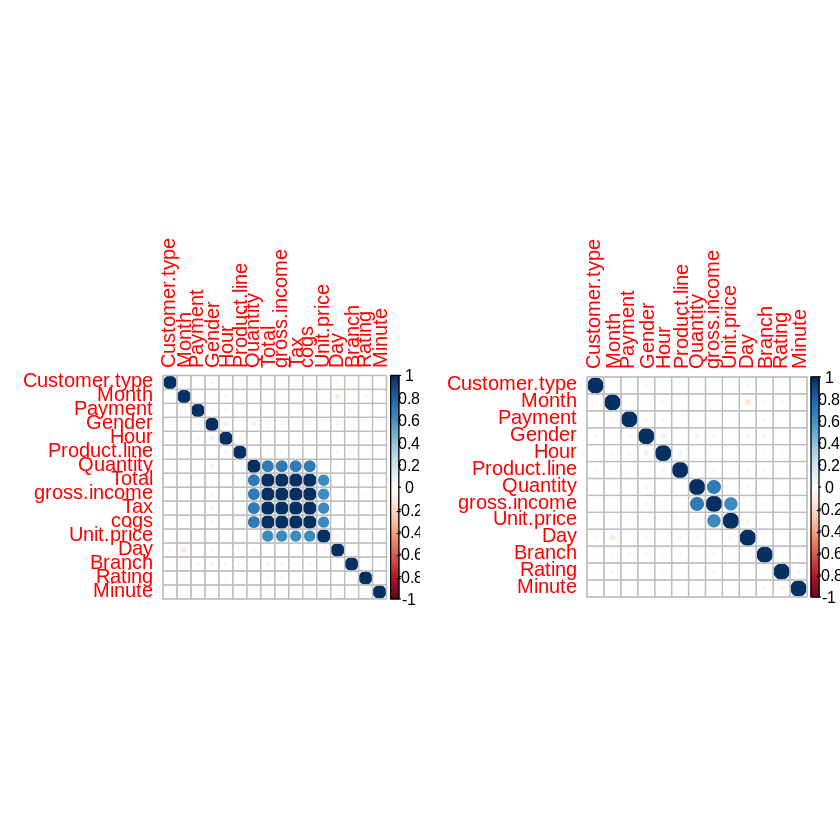

In [ ]:
# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below
# Removing Redundant Features 
data2<-data1[-highlyCorrelated]

# Performing our graphical comparison
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(data2), order = "hclust")


We can see from the matrix to the right that we have dropped the highly correlated features.

2. WRAPPER METHOD.

In [ ]:
# Installing and loading our clustvarsel package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
                         
library(clustvarsel)


Loading required package: mclust

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.

Package 'clustvarsel' version 2.3.3

Type 'citation("clustvarsel")' for citing this R package in publications.



In [ ]:
# Installing and loading our mclust package
# ---
# 
suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)

In [ ]:
# Sequential forward greedy search (default)
# ---
#
out = clustvarsel(data1, G = 1:5)
out

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step  BICclust Model G   BICdiff Decision
      Product.line          Add -3521.631     E 5  408.3674 Accepted
             Month          Add -5459.333   VEI 3  552.9502 Accepted
           Payment          Add -8092.699   VEV 4 -154.1886 Rejected
             Month       Remove -3498.098     E 5  529.4172 Rejected

Selected subset: Product.line, Month

In [ ]:
# The selection algorithm would indicate that the subset 
# we use for the clustering model is composed of variables X1 and X2 
# and that other variables should be rejected. 
# Having identified the variables that we use, we proceed to build the clustering model:
# ---
#

Subset1 = data1[,out$subset]
mod = Mclust(Subset1, G = 1:5)
summary(mod)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 3 components: 

 log-likelihood    n df       BIC       ICL
       -2688.22 1000 12 -5459.333 -5460.352

Clustering table:
  1   2   3 
223 648 129 

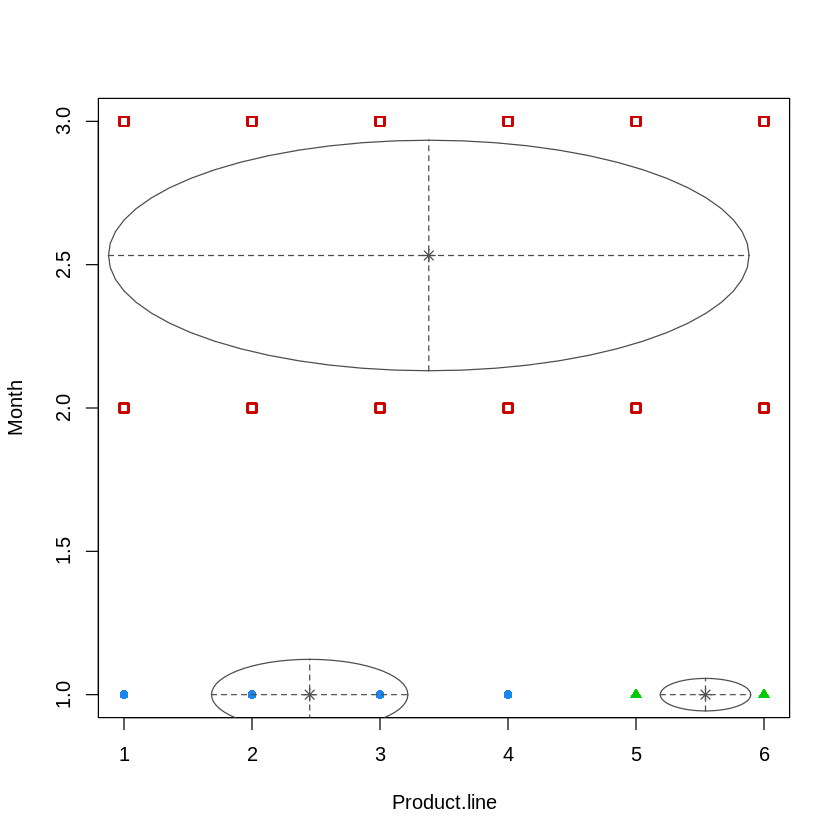

In [ ]:
plot(mod,c("classification"))

3. EMBEDDED METHODs

In [ ]:
# We will use the ewkm function from the wskm package.
# This is a weighted subspace clustering algorithm that is well suited to very high dimensional data.
suppressWarnings(
        suppressMessages(if
                         (!require(wskm, quietly=TRUE))
                install.packages("wskm")))
library(wskm)

Loading required package: latticeExtra


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer


Loading required package: fpc



In [ ]:
set.seed(2)
model <- ewkm(data1[1:4], 3, lambda=2, maxiter=1000)

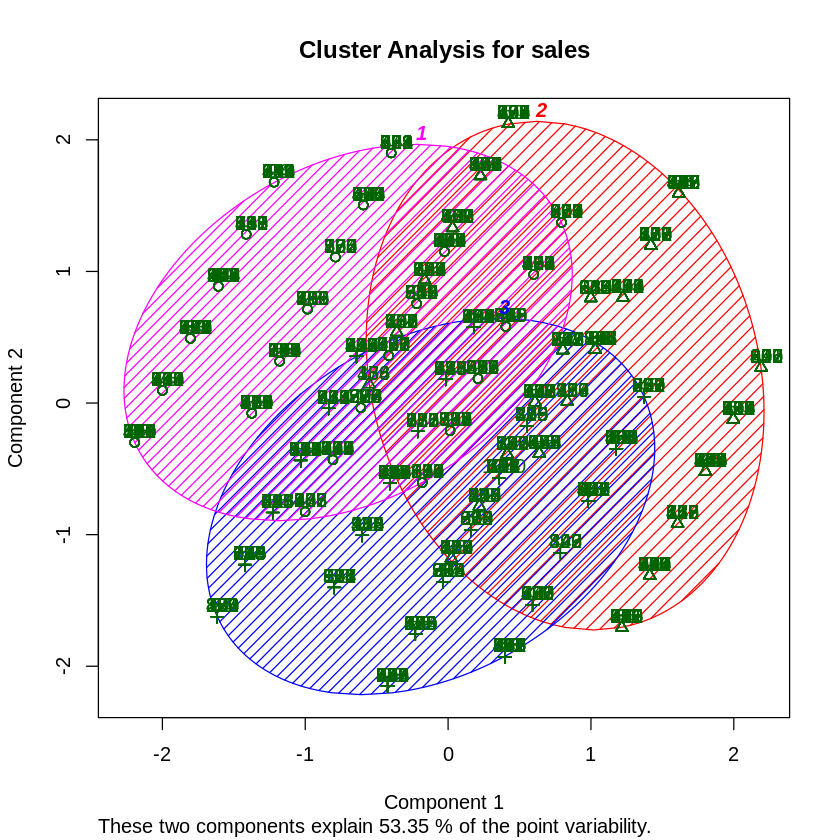

In [ ]:
# Loading and installing our cluster package
# ---
#
suppressWarnings(
        suppressMessages(if
                         (!require(cluster, quietly=TRUE))
                install.packages("cluster")))
library("cluster")

# Cluster Plot against 1st 2 principal components
# ---
#
clusplot(data1[1:4], model$cluster, color=TRUE, shade=TRUE,
         labels=2, lines=1,main='Cluster Analysis for sales')

In [ ]:
# Weights are calculated for each variable and cluster. 
# They are a measure of the relative importance of each variable 
# with regards to the membership of the observations to that cluster. 
# The weights are incorporated into the distance function, 
# typically reducing the distance for more important variables.
# Weights remain stored in the model and we can check them 
# 
round(model$weights*100,2)

,Branch,Customer.type,Gender,Product.line
1,0.00,99.99,0,0
2,99.99,0.00,0,0
3,0.00,99.99,0,0


4. FEATURE RANKING

In [ ]:
# ---
# We will use the FSelector Package. This is a package 
#containing functions for selecting attributes from a given dataset. 
# We install and load the required packages
suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [ ]:
head(data1)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,26.1415,3,522.83,26.1415,9.1,548.9715,5,1,4,9
2,3,2,1,1,15.28,5,3.8200,1,76.40,3.8200,9.6,80.2200,8,3,1,30
3,1,2,2,5,46.33,7,16.2155,2,324.31,16.2155,7.4,340.5255,3,3,4,24
4,1,1,2,4,58.22,8,23.2880,3,465.76,23.2880,8.4,489.0480,27,1,11,34
5,1,2,2,6,86.31,7,30.2085,3,604.17,30.2085,5.3,634.3785,8,2,1,38
6,3,2,2,1,85.39,7,29.8865,3,597.73,29.8865,4.1,627.6165,25,3,9,31


In [ ]:
# From the FSelector package, we use the correlation coefficient as a unit of valuation. 
# This would be one of the several algorithms contained 
# in the FSelector package that can be used rank the variables.
# ---
# 
Scores <- linear.correlation(Rating~., data1)
Scores

,attr_importance
,<dbl>
Branch,0.010238476
Customer.type,0.018888672
Gender,0.004800208
Product.line,0.020528973
Unit.price,0.008777507
Quantity,0.015814905
Tax,0.036441705
Payment,0.005381289
cogs,0.036441705


In [ ]:
# From the output above, we observe a list containing 
# rows of variables on the left and score on the right. 
# In order to make a decision, we define a cutoff 
# we want to use the top 5 representative variables, 
# through the use of the cutoff.k function included in the FSelector package. 
# Alternatively, we could define our cutoff visually 
Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

Subset
<fct>
Minute
Month
Tax
cogs
gross.income


In [ ]:
# We could also set cutoff as a percentage which would indicate 
# that we would want to work with the percentage of the best variables.
Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)

Subset2
<fct>
Minute
Month
Tax
cogs
gross.income
Total


In [ ]:
# Instead of using the scores for the correlation coefficient, 
# we can use an entropy - based approach 
# ---
# 
Scores2 <- information.gain(Rating~., data1)

# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)
# ---
# 
Subset3 <- cutoff.k(Scores2, 5)
as.data.frame(Subset3)

Subset3
<fct>
Branch
Customer.type
Gender
Product.line
Unit.price


From above, we can see that the most important variables are Branch,customer type,Gender,Product.line and the unit price.